In [9]:
import pandas as pd
import numpy as np
import math
from copy import deepcopy


#############################
# Import and combine all data
#############################


DATA_PATH = "/Users/mvonebers/HUBBS-Lab/data/"
#DATA_PATH = "/home/maggie/HUBBS-Lab/data/"

e4_data = pd.read_excel(DATA_PATH + "E4_TEST.xlsx")
change_data = pd.read_excel(DATA_PATH + "normalized_change.xlsx")
audio_data = pd.read_excel(DATA_PATH + "audio_TEST copy.xlsx")
demo_data = pd.read_csv(DATA_PATH + "Demographics Information.csv")


# Break apart the ID column into "person" and "trial"
def clean_id(data):
    data.insert(0, "person", [0] * data.shape[0])
    data.insert(1, "trial", [0] * data.shape[0])

    for i, row in data.iterrows():
        data.at[i, "person"] = int(data.at[i, "id"][7:])
        data.at[i, "trial"] = int(data.at[i, "id"][5])
    
    data = data.drop(columns=['id'])
    data = data.rename(columns={"person": "id"})
    return data

    
e4_data = clean_id(e4_data)
audio_data = clean_id(audio_data)    
    
all_data = pd.merge(e4_data, change_data, on='id')

# The audio data is a little more filled out than the E4 test, so we need to cull those extra columns.
audio_data = audio_data[audio_data.id != 16]
audio_data = audio_data[audio_data.id != 38]
audio_data = audio_data[audio_data.id != 46]
audio_data = audio_data[audio_data.id != 53]
audio_data = audio_data[audio_data.id != 58]
audio_data = audio_data[audio_data.id != 65]

all_data = all_data[all_data.id != 66]
all_data = audio_data.merge(all_data, how='right')


# Reorder survey data in order of most samples to least
columns = all_data.columns.to_list()
new_columns = deepcopy(columns)
new_columns[35] = columns[40]
new_columns[37] = columns[41] 
new_columns[38] = columns[37] 
new_columns[40] = columns[35]
new_columns[41] = columns[38]

all_data = all_data[new_columns]


# what does this do?
#demo_ids = demo_data['id'].to_list()
#
#for id_ in demo_ids:
#    if id_ not in slope_ids:
#        demo_data = demo_data[demo_data.id != id_]
        
all_data = all_data.merge(demo_data, how="right")
#print(all_data.shape)
#print(all_data.columns)

#for i in range(len(all_data.columns)):
#    print(i, all_data.columns[i])

[3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0,
 nan,
 1.0,
 3.0,
 2.0,
 1.0,
 1.0]

In [3]:
"""
Get slopes from linear regression of the 8 trials for each ID
"""
# 20 participants in total
from sklearn.linear_model import LinearRegression

def get_slopes(data, start, end):
    y0 = data['trial'].to_numpy(copy=True)

    slopes = pd.DataFrame(np.zeros((19, 50)), columns=data.columns)
    slopes = slopes.drop(["trial"], axis=1)

    for col in range(2, 34):
        x1 = data[data.columns[col]]
        y0 = list(range(start, end + 1))
        for row in range(19):
            x0 = x1[ (row * 8) + start - 1 : (row * 8) + end ].to_numpy()
            x = np.array([])
            y = np.array([])
            
            slopes.iloc[row, 0] = data.iloc[row * 8, 0]

            for i in range(len(x0)):  # remove NaN from data
                if not math.isnan(x0[i]) and not math.isnan(y0[i]):
                    x = np.append(x, x0[i])
                    y = np.append(y, y0[i])
            
            try:
                reg = LinearRegression().fit(y.reshape(-1,1),x)
                slopes.iloc[row, col - 1] = reg.coef_
            except:
                 slopes.iloc[row, col - 1] = 0
    
    for col in range(34, 50):
        for row in range(19):
            slopes.iloc[row, col - 1] = data.iloc[row * 8, col]
            
    # Want to preserve zeros in the demographic data, so temporarily boost it up one...
    for col in range(43, 50):
        for row in range(19):
            slopes.iloc[row, col - 1] += 1.0
                    
    slopes.replace(0, np.NaN, inplace=True)
    
    # Then bump it back down.
    for col in range(43, 50):
        for row in range(19):
            slopes.iloc[row, col - 1] -= 1.0
    
    return slopes

all_slopes = get_slopes(all_data, 1, 8)
slope_ids = all_slopes['id'].to_list()
#slope_ids
all_slopes

,id,pcm_RMSenergy_sma_amean,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[8]_amean,...,CAI Trait Dyadic Score,CAI Trait Small group Score,Age,Gender,Lang,college,presentation,ethnicity,presentation_3_months,highest_education
0,4.0,-0.000864,-1.188091,1.458396,-0.644213,-0.697069,-0.543809,2.068849,-1.118681,0.597193,...,0.153846,0.047619,3.0,1.0,2.0,1.0,2.0,1.0,0.0,3.0
1,5.0,-0.004605,0.022244,0.041306,0.371020,1.856300,-2.347585,2.857080,-0.310527,-0.021322,...,0.166667,0.090909,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0
2,8.0,0.001767,-0.545172,-0.233862,0.693634,-1.303848,-0.635333,0.913341,-0.946743,-0.024012,...,0.133333,0.083333,1.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0
3,20.0,-0.003113,0.120467,-0.326470,0.884765,-0.090467,0.182058,-0.183818,0.728905,-0.347066,...,NaN,NaN,1.0,1.0,2.0,3.0,1.0,2.0,2.0,1.0
4,21.0,-0.000428,-0.201158,-0.268297,0.201903,-0.366338,0.377646,0.226589,-0.530547,0.462883,...,0.312500,NaN,1.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0
5,23.0,-0.002165,-0.024271,0.128524,0.470709,1.293796,-1.696810,3.038421,-0.332586,-0.556816,...,NaN,-0.058824,1.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0
6,32.0,-0.001112,0.432318,-0.105907,1.495445,-1.006756,1.001877,0.911382,-0.181762,-0.036236,...,0.375000,-0.181818,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0
7,35.0,-0.003161,0.366671,0.193564,-0.023716,0.258827,0.975375,-0.922304,0.307595,-0.030484,...,-0.142857,0.125000,1.0,2.0,1.0,3.0,4.0,1.0,2.0,1.0
8,37.0,-0.000485,0.394130,0.261597,-0.139036,0.246071,0.183514,0.162386,-0.175606,-0.127135,...,0.176471,-0.083333,1.0,1.0,NaN,4.0,2.0,3.0,1.0,1.0
9,41.0,-0.000964,-0.020902,0.018043,0.745624,0.887429,-3.439343,1.431304,-0.421041,-1.802264,...,0.217391,0.050000,2.0,2.0,1.0,1.0,3.0,3.0,2.0,2.0


In [4]:
#from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_predict
from scipy.stats import pearsonr

y_columns = change_data.columns.to_list()[1:]

def get_combo_predictions(X0, slope_data):
    corrs = []
    ps = []
    for y_col, y_i in zip(y_columns, range(len(y_columns))):
        y0 = slope_data[y_col].to_numpy(copy=True)
        X = np.array([X0[0]])
        y = np.array(y0[0])
        
        for i in range(1,len(X0)):  # remove NaN from data
            is_nan = False
            for x in X0[i]:
                if math.isnan(x):
                    is_nan = True
                    break
            if not math.isnan(y0[i]) and not is_nan:
                X = np.append(X, [X0[i]], axis=0)
                y = np.append(y, y0[i])
            
        folds = min(10, len(X))
        model = LinearRegression()
        cv = KFold(folds, shuffle=True, random_state=42)
        predicted_vals0 = cross_val_predict(model, X, y, cv=cv)
        actual_vals0 = slope_data[y_col].to_numpy(copy=True)
        predicted_vals = []
        actual_vals = []
        

        for j in range(len(predicted_vals0)):
            if not math.isnan(predicted_vals0[j]) and not math.isnan(actual_vals0[j]):
                predicted_vals.append(predicted_vals0[j])
                actual_vals.append(actual_vals0[j])

        correlation, pval = pearsonr(predicted_vals, actual_vals)
        #to_print = str(correlation) + str(pval)
        #if pval < 0.15: 
        #    if not folds == 10:
        #        print("With # KFolds", folds)
        #    print("{0}:\t\t{1}\t\t{2}\t{3}\t\t{4}".format(y_col, correlation, pval, "Rows:", len(y)))
        corrs.append(correlation)
        ps.append(pval)
        
    return corrs, ps
      
def generate_combos(slope_data):
    group_c = []
    group_p = []
    group_titles = []

    group_titles.append('mfcc1-12')
    X0_mfcc = slope_data[slope_data.columns[2:14]].to_numpy(copy=True)
    c,p = get_combo_predictions(X0_mfcc, slope_data)
    group_c.append(c)
    group_p.append(p)

    group_titles.append('pauses')
    X0_pauses = slope_data[slope_data.columns[17:20]].to_numpy(copy=True) # #pause, pause_frequency, pause_interval
    c, p = get_combo_predictions(X0_pauses, slope_data)
    group_c.append(c)
    group_p.append(p)

    group_titles.append('mfccs + pauses')
    columns = slope_data.columns[2:14].to_list() + slope_data.columns[17:20].to_list()
    X0_pauses = slope_data[columns].to_numpy(copy=True) # #pause, pause_frequency, pause_interval
    c, p = get_combo_predictions(X0_pauses, slope_data)
    group_c.append(c)
    group_p.append(p)

    group_titles.append('jitter, shimmer')
    X0_jitter = slope_data[slope_data.columns[22:24]].to_numpy(copy=True)
    c,p = get_combo_predictions(X0_jitter, slope_data)
    group_c.append(c)
    group_p.append(p)

    group_titles.append('mfccs+ jitter, shimmer')
    columns = slope_data.columns[2:14].to_list() + slope_data.columns[22:24].to_list()
    X0_jitter = slope_data[columns].to_numpy(copy=True)
    c,p = get_combo_predictions(X0_jitter, slope_data)
    group_c.append(c)
    group_p.append(p)

    group_titles.append("all bio")
    X0_eda = slope_data[slope_data.columns[23:30]].to_numpy(copy=True)
    c,p = get_combo_predictions(X0_eda, slope_data)
    group_c.append(c)
    group_p.append(p)

    group_titles.append('bio + mfcc')
    columns = slope_data.columns[2:14].to_list() + slope_data.columns[23:30].to_list()
    X0_bio_mfcc = slope_data[columns].to_numpy(copy=True)
    c,p = get_combo_predictions(X0_bio_mfcc, slope_data)
    group_c.append(c)
    group_p.append(p)
    
    #return group_c, group_p, group_titles

    # All mfcc's combined with other attributes
    for i in range(14, 25):
        title = "mfccs + " + str(slope_data.columns[i])
        group_titles.append(title)
        columns = slope_data.columns[2:14].to_list() + [slope_data.columns[i]]
        X0 = slope_data[columns].to_numpy(copy=True)
        c,p = get_combo_predictions(X0, slope_data)
        group_c.append(c)
        group_p.append(p)

    for i in range(14, 25):
        col1 = slope_data.columns[i]
        for j in range(i + 1, 25):
            col2 = slope_data.columns[j]
            title = str(col1) + '+' + str(col2)
            group_titles.append(title)
            X0 = slope_data[[col1, col2]].to_numpy(copy=True)
            c, p = get_combo_predictions(X0, slope_data)
            group_c.append(c)
            group_p.append(p)

    for i in range(14, 25):
        col1 = slope_data.columns[i]
        for j in range(i + 1, 25):
            col2 = slope_data.columns[j]
            columns = slope_data.columns[2:14].to_list() + [col1] + [col2]
            title = "mfccs + " + str(col1) + '+' + str(col2)
            group_titles.append(title)
            X0 = slope_data[[col1, col2]].to_numpy(copy=True)
            c, p = get_combo_predictions(X0, slope_data)
            group_c.append(c)
            group_p.append(p)

    for i in range(14, 24):
        col = slope_data.columns[i]
        title = 'bio +' + str(col)
        group_titles.append(title)
        columns = slope_data.columns[23:30].to_list() + [col]
        X0_eda = slope_data[columns].to_numpy(copy=True)
        c,p = get_combo_predictions(X0_eda, slope_data)
        group_c.append(c)
        group_p.append(p)

    for i in range(14, 24):
        col = slope_data.columns[i]
        title = 'mfcc + bio +' + str(col)
        group_titles.append(title)
        columns = slope_data.columns[2:14].to_list() + slope_data.columns[23:30].to_list() + [col]
        X0_eda = slope_data[columns].to_numpy(copy=True)
        c,p = get_combo_predictions(X0_eda, slope_data)
        group_c.append(c)
        group_p.append(p)
        
    return group_c, group_p, group_titles

#group_c, group_p, group_titles = generate_combos(all_slopes)

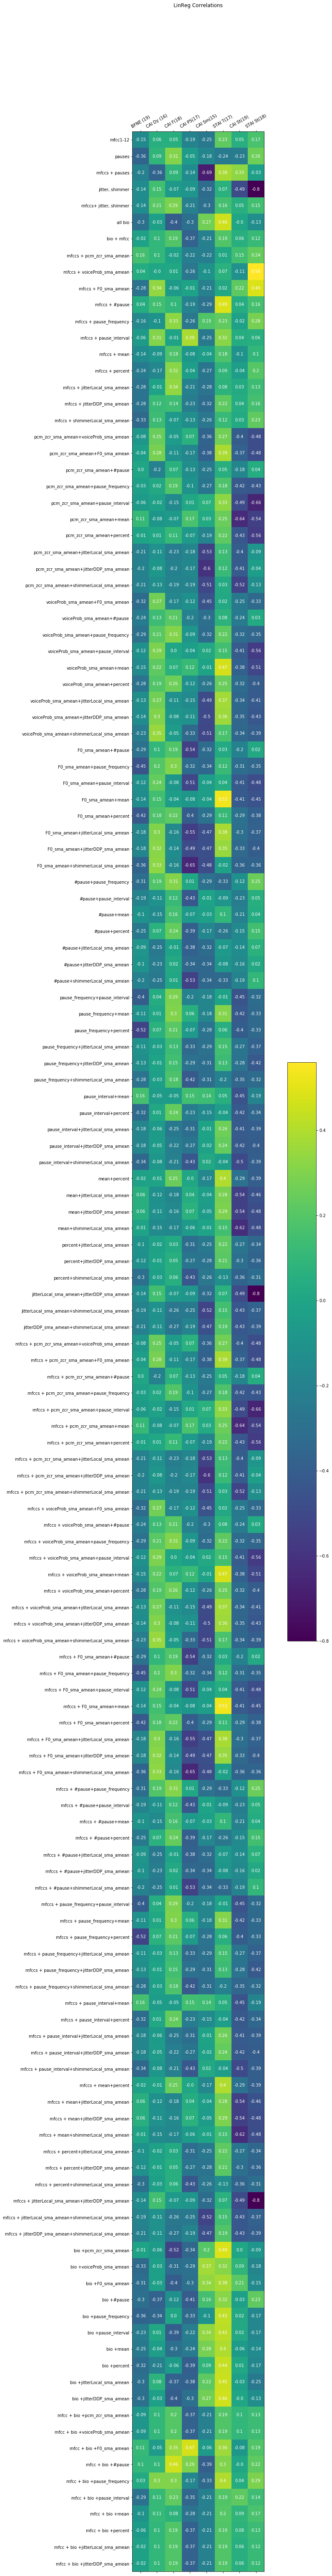

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

short_y_col = ["BFNE (19)", "CAI Dy (16)", "CAI F(18)", "CAI PS(17)", "CAI Sm(15)", "STAI T(17)", "CAI St(19)", "STAI St(18)"]
correlations = np.matrix(group_c)
pvalues = np.matrix(group_p)

correlations = np.round(correlations, decimals=2)
pvalues = np.round(pvalues, decimals=2)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,85))

p = ax.matshow(correlations)
fig.colorbar(p, ax=ax, fraction=0.05, pad=0.04)
ax.set_xticklabels(labels=[''] + short_y_col)
ax.set_yticklabels(labels=group_titles)
plt.yticks(np.arange(0, len(group_titles), 1.0))
for tick in ax.get_xticklabels():
    tick.set_rotation(30)  
    
for i in range(len(short_y_col)):
    for j in range(len(group_titles)):
        text = ax.text(i, j, correlations[j, i], ha="center", va="center", color="w")
    
plt.title('LinReg Correlations')
fig.tight_layout()
plt.savefig(DATA_PATH + 'correlatons.png')
plt.show()

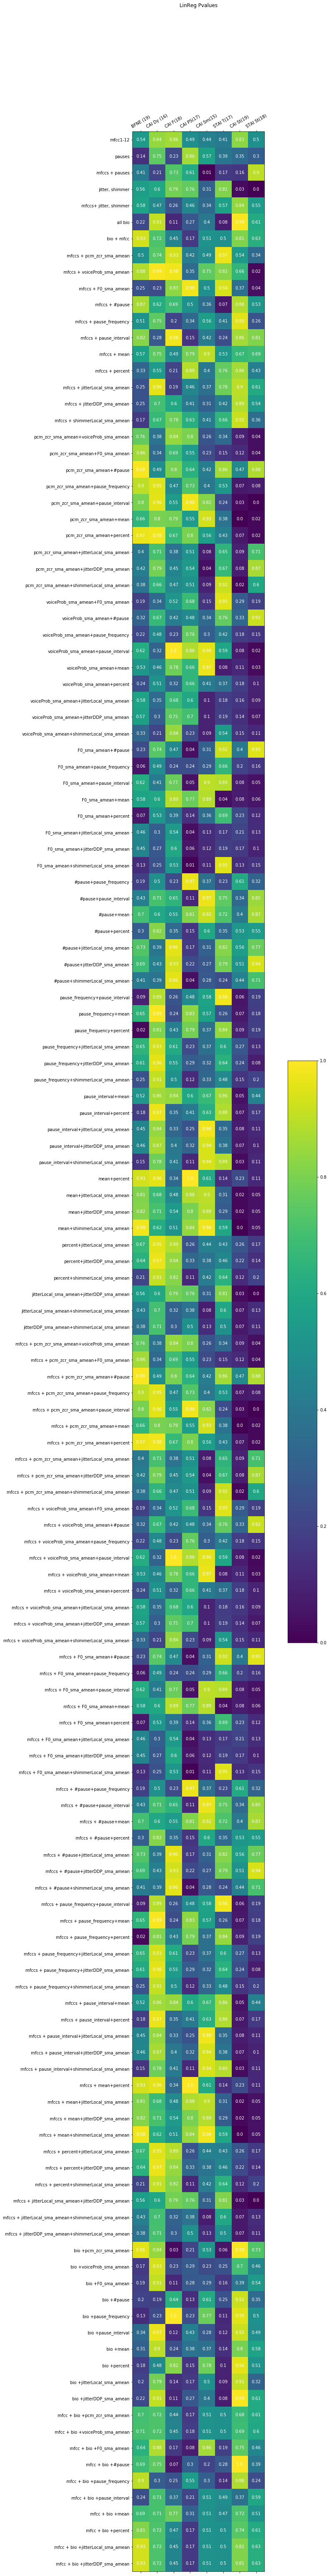

In [63]:
fig, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(20,85))
p = ax2.matshow(pvalues)
fig.colorbar(p, ax=ax2, fraction=0.05, pad=0.04)
ax2.set_xticklabels(labels=[''] + short_y_col)  
ax2.set_yticklabels(labels=group_titles)
plt.yticks(np.arange(0, len(group_titles), 1.0))
for tick in ax2.get_xticklabels():
    tick.set_rotation(30)
    
for i in range(len(short_y_col)):
    for j in range(len(group_titles)):
        text = ax2.text(i, j, pvalues[j, i], ha="center", va="center", color="w")

plt.title('LinReg Pvalues')
fig.tight_layout()
plt.savefig(DATA_PATH + 'pvalues.png')
plt.show()

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def generate_graphs(c, p, titles, specifier):
    short_y_col = ["BFNE (19)", "CAI St(19)", "CAI F(18)" , "STAI St(18)", "CAI PS(17)", "STAI T(17)", "CAI Dy (16)", "CAI Sm(15)"]
    correlations = np.matrix(c)
    pvalues = np.matrix(p)

    correlations = np.round(correlations, decimals=2)
    pvalues = np.round(pvalues, decimals=2)
    
    data = [correlations, pvalues]
    graph_titles = ["correlations_" + specifier + ".png", "pvalues_" + specifier + ".png"]
    
    for k in range(2):
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,85))
        
        if k == 0:
            p = ax.pcolor(data[k], vmin=-0.5, vmax=0.8)
        else:
            p = ax.pcolor(data[k], vmin = 0.0, vmax = 1.0)
        #p = ax.matshow(data[k])
        fig.colorbar(p, ax=ax, fraction=0.05, pad=0.04)
        ax.set_xticklabels(labels=short_y_col)
        ax.set_yticklabels(labels=titles)
        plt.yticks(np.arange(0, len(titles), 1.0))
        for tick in ax.get_xticklabels():
            tick.set_rotation(30)  

        for i in range(len(short_y_col)):
            for j in range(len(titles)):
                text = ax.text(i + 0.5, j + 0.5, data[k][j, i], ha="center", va="center", color="w")

        fig.tight_layout()
        plt.savefig(DATA_PATH + graph_titles[k])
        plt.close()
        

"""#slopes_3 = get_slopes(all_data, 1, 3)
#c3, p3, titles3 = generate_combos(slopes_3)
#generate_graphs(c3, p3, titles3, '3')

#slopes_3 = get_slopes(all_data, 5)
#c3, p3, titles3 = generate_combos(slopes_3)
#generate_graphs(c3, p3, titles3, '5')

slopes_all = get_slopes(all_data, 1, 8)
c, p, titles = generate_combos(slopes_all)
generate_graphs(c, p, titles, 'all')

first_4 = get_slopes(all_data, 1, 4)
c4, p4, titles4 = generate_combos(first_4)
generate_graphs(c4, p4, titles4, 'first4')

middle_4 = get_slopes(all_data, 3, 6)
c4, p4, titles4 = generate_combos(middle_4)
generate_graphs(c4, p4, titles4, 'middle4')

last_4 = get_slopes(all_data, 5, 8)
c4, p4, titles4 = generate_combos(last_4)
generate_graphs(c4, p4, titles4, 'last4')

for i in range(1, 5):
    title = str(2*i - 1) + '-' + str(2*i)
    pair = get_slopes(all_data, 2*i - 1, 2*i)
    c2, p2, titles2 = generate_combos(pair)
    generate_graphs(c2, p2, titles2, title)"""

"#slopes_3 = get_slopes(all_data, 1, 3)\n#c3, p3, titles3 = generate_combos(slopes_3)\n#generate_graphs(c3, p3, titles3, '3')\n\n#slopes_3 = get_slopes(all_data, 5)\n#c3, p3, titles3 = generate_combos(slopes_3)\n#generate_graphs(c3, p3, titles3, '5')\n\nslopes_all = get_slopes(all_data, 1, 8)\nc, p, titles = generate_combos(slopes_all)\ngenerate_graphs(c, p, titles, 'all')\n\nfirst_4 = get_slopes(all_data, 1, 4)\nc4, p4, titles4 = generate_combos(first_4)\ngenerate_graphs(c4, p4, titles4, 'first4')\n\nmiddle_4 = get_slopes(all_data, 3, 6)\nc4, p4, titles4 = generate_combos(middle_4)\ngenerate_graphs(c4, p4, titles4, 'middle4')\n\nlast_4 = get_slopes(all_data, 5, 8)\nc4, p4, titles4 = generate_combos(last_4)\ngenerate_graphs(c4, p4, titles4, 'last4')\n\nfor i in range(1, 5):\n    title = str(2*i - 1) + '-' + str(2*i)\n    pair = get_slopes(all_data, 2*i - 1, 2*i)\n    c2, p2, titles2 = generate_combos(pair)\n    generate_graphs(c2, p2, titles2, title)"

In [10]:
#age1 = all_slopes[all_slopes.Age == 1.0]
#age1

,id,pcm_RMSenergy_sma_amean,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[8]_amean,...,CAI Trait Dyadic Score,CAI Trait Small group Score,Age,Gender,Lang,college,presentation,ethnicity,presentation_3_months,highest_education
0,4.0,-0.000864,-1.188091,1.458396,-0.644213,-0.697069,-0.543809,2.068849,-1.118681,0.597193,...,0.153846,0.047619,3.0,1.0,2.0,1.0,2.0,1.0,0.0,3.0
1,5.0,-0.004605,0.022244,0.041306,0.371020,1.856300,-2.347585,2.857080,-0.310527,-0.021322,...,0.166667,0.090909,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0
2,8.0,0.001767,-0.545172,-0.233862,0.693634,-1.303848,-0.635333,0.913341,-0.946743,-0.024012,...,0.133333,0.083333,1.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0
3,20.0,-0.003113,0.120467,-0.326470,0.884765,-0.090467,0.182058,-0.183818,0.728905,-0.347066,...,NaN,NaN,1.0,1.0,2.0,3.0,1.0,2.0,2.0,1.0
4,21.0,-0.000428,-0.201158,-0.268297,0.201903,-0.366338,0.377646,0.226589,-0.530547,0.462883,...,0.312500,NaN,1.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0
5,23.0,-0.002165,-0.024271,0.128524,0.470709,1.293796,-1.696810,3.038421,-0.332586,-0.556816,...,NaN,-0.058824,1.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0
6,32.0,-0.001112,0.432318,-0.105907,1.495445,-1.006756,1.001877,0.911382,-0.181762,-0.036236,...,0.375000,-0.181818,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0
7,35.0,-0.003161,0.366671,0.193564,-0.023716,0.258827,0.975375,-0.922304,0.307595,-0.030484,...,-0.142857,0.125000,1.0,2.0,1.0,3.0,4.0,1.0,2.0,1.0
8,37.0,-0.000485,0.394130,0.261597,-0.139036,0.246071,0.183514,0.162386,-0.175606,-0.127135,...,0.176471,-0.083333,1.0,1.0,NaN,4.0,2.0,3.0,1.0,1.0
9,41.0,-0.000964,-0.020902,0.018043,0.745624,0.887429,-3.439343,1.431304,-0.421041,-1.802264,...,0.217391,0.050000,2.0,2.0,1.0,1.0,3.0,3.0,2.0,2.0


In [14]:
def analyze_with_demo(slopes):
    slopes.dropna(inplace=True)
    age1 = slopes[slopes.Age == 1.0]
    age2 = slopes[slopes.Age == 2.0]
    age3 = slopes[slopes.Age == 3.0]
    gender1 = slopes[slopes.Gender == 1.0]
    gender2 = slopes[slopes.Gender == 2.0]
    college1 = slopes[slopes.college == 1.0]
    college2 = slopes[slopes.college == 2.0]
    college3 = slopes[slopes.college == 3.0]
    college4 = slopes[slopes.college == 4.0]
    ethnicity1 = slopes[slopes.ethnicity == 1.0]
    ethnicity2 = slopes[slopes.ethnicity == 2.0]
    ethnicity3 = slopes[slopes.ethnicity == 3.0]
    ethnicity4 = slopes[slopes.ethnicity == 4.0]
    presentation0 = slopes[slopes.presentation_3_months == 0.0]
    presentation1 = slopes[slopes.presentation_3_months == 1.0]
    presentation2 = slopes[slopes.presentation_3_months == 2.0]
    edu1 = slopes[slopes.highest_education == 1.0]
    edu2 = slopes[slopes.highest_education == 2.0]
    edu3 = slopes[slopes.highest_education == 2.0]
    
    all_demos = [age1, age2, age3, gender1, gender2, college1, 
                 college2, college3, college4, ethnicity1, 
                 ethnicity2, ethnicity3, ethnicity4, presentation0,
                presentation1, presentation2, edu1, edu2, edu3]
    demo_titles = ["age1", "age2", "age3", "gender1", "gender2", "college1", "college2", 
                   "college3", "college4", "ethnicity1", "ethnicity2", "ethnicity3", 
                   "ethnicity4", "presentation0", "presentation1", "presentation2", "edu1", 
                   "edu2", "edu3"]
    
    for d, t in zip(all_demos, demo_titles):
        if d.shape[0] < 3:
            continue
        print(t, "had", d.shape[0], "samples")
        c, p, titles = generate_combos(d)
        print("Finished", t)
        generate_graphs(c, p, titles, t)
        
analyze_with_demo(all_slopes)

Finished age1
Finished gender1
Finished gender2
Finished college1
Finished college3
Finished ethnicity1
Finished ethnicity2
Finished presentation1
Finished edu1
